## Actor Analysis: Who Should We Cast?

In this Jupiter Notebook I will be combining the credits csv and the titles csv in order to analyze the most popular and highly rated actors with films on Netflix. I will also be creating a function to sort the most popular actors by genre as well.

In [12]:
# Importing libraries and files
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.stats import linregress
import numpy as np
from getdata import netflix_df
from getdata import actors_df

### 1. Beginning with combining and cleaning the data

In [13]:
# Pairing down the data to only actors who have more than one project on Netflix
clean_actor_df = actors_df.drop(actors_df[actors_df['role'] == 'DIRECTOR'].index)
clean_actor_df = clean_actor_df[clean_actor_df.duplicated("name", keep=False)]

In [14]:
# Creating a dictionary with the each film id as the key and the list of actors as each value
actor_dict = {}
for index, row in clean_actor_df.iterrows():
    if row["id"] in actor_dict: 
        actor_dict[str(row["id"])].append(row["name"])
    else: 
        actor_dict[str(row["id"])] = [row["name"]]       

In [15]:
# Reconfiguring the data into a new dictionary so the entire cast would be in one cell, then creating a dataframe
cast_list = []

for key, value in actor_dict.items():
    cast_list.append({"id": key, "cast": value})

id_cast_df = pd.DataFrame(cast_list, columns=["id", "cast"])
id_cast_df.head()

,id,cast
0,tm84618,"[Robert De Niro, Harvey Keitel, Cybill Shepher..."
1,tm154986,"[Jon Voight, Burt Reynolds, Ronny Cox, Billy R..."
2,tm127384,"[Graham Chapman, John Cleese, Eric Idle, Terry..."
3,tm120801,"[Lee Marvin, Ernest Borgnine, Jim Brown, Rober..."
4,ts22164,"[Graham Chapman, Michael Palin, Terry Jones, E..."


In [16]:
# Creating a new netflix dataframe with only the relevant columns, dropping empty rows, then merging with the "cast" dataframe to create a dataframe with the full cast for each production
new_netflix_df = pd.DataFrame({"id": netflix_df["id"], 
                  "title": netflix_df["title"],   
                  "genres": netflix_df["genres"],  
                  "imdb_score": netflix_df["imdb_score"], 
                  "imdb_votes": netflix_df["imdb_votes"]
                  })
new_netflix_df = new_netflix_df.dropna()
full_cast_df = new_netflix_df.merge(id_cast_df)
full_cast_df.head()

,id,title,genres,imdb_score,imdb_votes,cast
0,tm84618,Taxi Driver,"['drama', 'crime']",8.2,808582.0,"[Robert De Niro, Harvey Keitel, Cybill Shepher..."
1,tm154986,Deliverance,"['drama', 'action', 'thriller', 'european']",7.7,107673.0,"[Jon Voight, Burt Reynolds, Ronny Cox, Billy R..."
2,tm127384,Monty Python and the Holy Grail,"['fantasy', 'action', 'comedy']",8.2,534486.0,"[Graham Chapman, John Cleese, Eric Idle, Terry..."
3,tm120801,The Dirty Dozen,"['war', 'action']",7.7,72662.0,"[Lee Marvin, Ernest Borgnine, Jim Brown, Rober..."
4,ts22164,Monty Python's Flying Circus,"['comedy', 'european']",8.8,73424.0,"[Graham Chapman, Michael Palin, Terry Jones, E..."


### 2. Creating a dataframe to then chart the most popular/highly rated actors on Netflix

In [17]:
# Creating a list then Dataframe for each individual actor
actor_list = []

for index, row in full_cast_df.iterrows():
    for actor in row["cast"]:
                actor_list.append({"name": actor, "genres": row["genres"], "imdb_score": row["imdb_score"], "imdb_votes": row["imdb_votes"]})

multiple_actor_df = pd.DataFrame(actor_list, columns=["name", "genres", "imdb_score", "imdb_votes"])
multiple_actor_df.head()

,name,genres,imdb_score,imdb_votes
0,Robert De Niro,"['drama', 'crime']",8.2,808582.0
1,Harvey Keitel,"['drama', 'crime']",8.2,808582.0
2,Cybill Shepherd,"['drama', 'crime']",8.2,808582.0
3,Peter Boyle,"['drama', 'crime']",8.2,808582.0
4,Martin Scorsese,"['drama', 'crime']",8.2,808582.0


In [18]:
# Grouping by most votes and average score then merging those dataframes and sorting by most votes
most_votes_df = pd.DataFrame(multiple_actor_df.groupby("name")["imdb_votes"].sum())
average_score_df = pd.DataFrame(multiple_actor_df.groupby("name")["imdb_score"].mean())

final_actor_df = pd.merge(most_votes_df, average_score_df, on="name")
most_votes_df = final_actor_df.sort_values("imdb_votes", ascending=False)
most_votes_df.head(20)

,imdb_votes,imdb_score
name,,
Leonardo DiCaprio,8313221.0,7.925000
Cillian Murphy,5094611.0,8.450000
Marion Cotillard,5003252.0,7.800000
Morgan Freeman,4803877.0,7.250000
Tom Hardy,4761544.0,7.975000
Michael Caine,4601912.0,7.620000
Miranda Nolan,4582943.0,8.333333
Joseph Gordon-Levitt,4283943.0,7.650000
Russ Fega,3963298.0,8.600000


### 3. Creating bar charts of the most popular actors
i.e. Actors with the most votes on IMDB

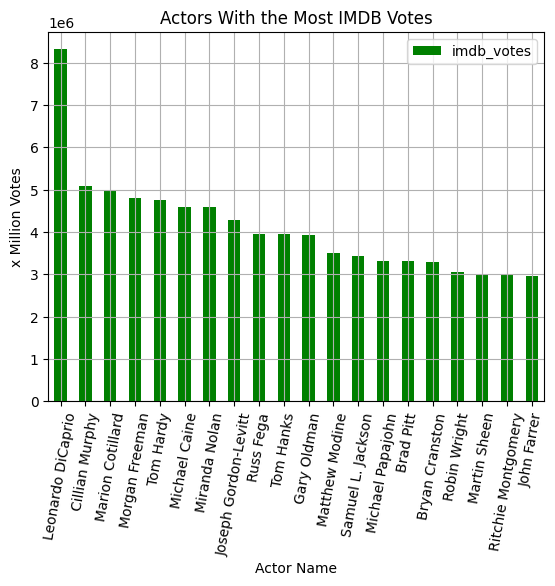

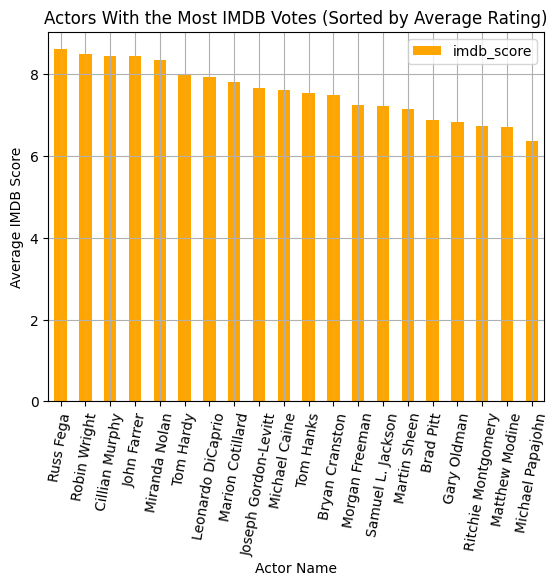

In [19]:
# Creating a bar chart of the top twenty vote getters
top_twenty = most_votes_df.head(20)
top_twenty.plot.bar(y='imdb_votes', color='green', width=0.5)
plt.title('Actors With the Most IMDB Votes')
plt.ylabel('x Million Votes')
plt.xlabel('Actor Name')
plt.xticks(rotation=80)
plt.grid()
plt.savefig("output/Actors by IMDB_Votes")

# Then sorting that data by highest average IMDB rating and creating that chart
top_twenty_by_rating = top_twenty.sort_values("imdb_score", ascending=False)
top_twenty_by_rating.plot.bar(y='imdb_score', color='orange', width=0.5)
plt.title('Actors With the Most IMDB Votes (Sorted by Average Rating)')
plt.xlabel('Actor Name')
plt.ylabel('Average IMDB Score')
plt.xticks(rotation=80)
plt.grid()
plt.savefig("output/Actors by IMDB_Votes&Rating")

plt.show()

### 3. Creating bar charts of the highest rated actors
i.e. Actors with the highest rated projects on IMDB

In [20]:
# Sorting actors by highest rating and filtering out the bottom 50% of vote getters
high_rated_df = final_actor_df.sort_values("imdb_score", ascending=False)
top_50 = high_rated_df["imdb_votes"].quantile(.50)
high_rated_df = high_rated_df[high_rated_df["imdb_votes"] >= top_50]
high_rated_df.head(10)

,imdb_votes,imdb_score
name,,
Emily Carey,2021343.0,8.80
Russ Fega,3963298.0,8.60
Akari Kito,138247.0,8.60
Shanola Hampton,234232.0,8.60
Emily Hampshire,117203.0,8.55
Sarah Levy,117203.0,8.55
Kim Tae-hun,47053.0,8.55
Adivi Sesh,127686.0,8.55
Annie Murphy,117203.0,8.55


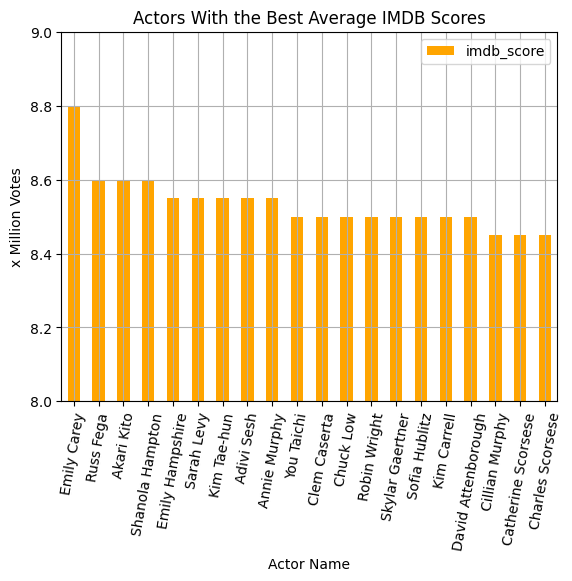

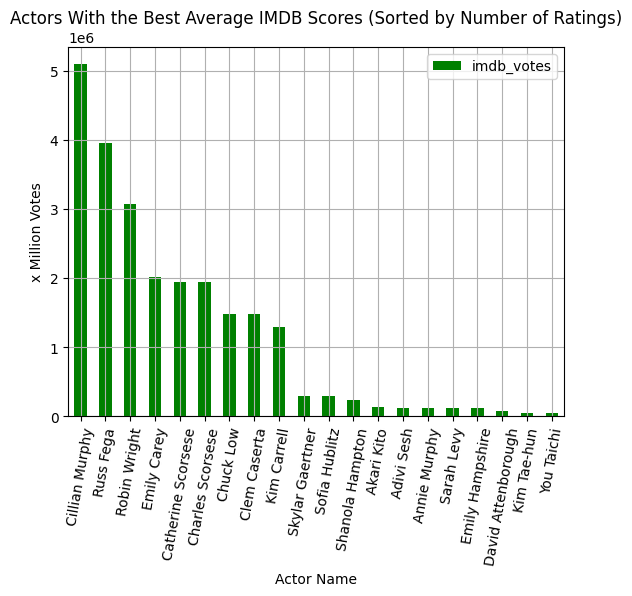

In [21]:
# Creating a bar chart of the top twenty averge scores
best_score = high_rated_df.head(20)
best_score.plot.bar(y='imdb_score', color='orange', width=0.5)
plt.xlabel('Actor Name')
plt.title('Actors With the Best Average IMDB Scores')
plt.ylabel('x Million Votes')
plt.ylim(bottom=8.0, top=9.0)
plt.xticks(rotation=80)
plt.grid()
plt.savefig("output/Actors by IMDB_Score")

# Then sorting that data by most ratings and creating that chart
best_score_most_votes = best_score.sort_values("imdb_votes", ascending=False)
best_score_most_votes.plot.bar(y='imdb_votes', color='green', width=0.5)
plt.title('Actors With the Best Average IMDB Scores (Sorted by Number of Ratings)')
plt.xlabel('Actor Name')
plt.ylabel('x Million Votes')
plt.xticks(rotation=80)
plt.grid()
plt.savefig("output/Actors by IMDB_Score&Votes")

plt.show()

### 4. But what about TMDB?
Is there a significant difference between TMDB and IMDB scores?

In [22]:
# The following is a repeat of the steps from section 1, cleaning the data. The biggest difference is bringing in the tmdb rating data.
tmdb_netflix_df = pd.DataFrame({"id": netflix_df["id"], 
                  "tmdb_score": netflix_df["tmdb_score"], 
                  "tmdb_popularity": netflix_df["tmdb_popularity"], 
                  "title": netflix_df["title"]
                  })
tmdb_netflix_df = tmdb_netflix_df.dropna()
tmdb_cast_df = tmdb_netflix_df.merge(id_cast_df)


In [23]:
actor_list2 = []

for index, row in tmdb_cast_df.iterrows():
    for actor in row["cast"]:
                actor_list.append({"name": actor, "tmdb_score": row["tmdb_score"], "tmdb_popularity": row["tmdb_popularity"]})

tmdb_actors_df = pd.DataFrame(actor_list, columns=["name", "tmdb_score", "tmdb_popularity"])

tmdb_most_votes_df = pd.DataFrame(tmdb_actors_df.groupby("name")["tmdb_popularity"].sum())
tmdb_average_score_df = pd.DataFrame(tmdb_actors_df.groupby("name")["tmdb_score"].mean())

tmdb_final_actor_df = pd.merge(tmdb_most_votes_df, tmdb_average_score_df, on="name")
tmdb_final_actor_df.head()

,tmdb_popularity,tmdb_score
name,,
'Weird Al' Yankovic,21.926,6.400000
50 Cent,64.791,6.700000
A$AP Rocky,26.672,6.700000
A.D. Miles,37.781,6.556500
A.J. LoCascio,65.006,7.033333


In [24]:
# Now we merge the df with the TMDB data with our previous df with IMDB data
imdb_tmdb_merge = pd.merge(final_actor_df, tmdb_final_actor_df, on="name")
imdb_tmdb_merge = imdb_tmdb_merge.dropna()
imdb_tmdb_merge

,imdb_votes,imdb_score,tmdb_popularity,tmdb_score
name,,,,
'Weird Al' Yankovic,21702.0,6.500000,21.926,6.400000
50 Cent,174900.0,6.866667,64.791,6.700000
A$AP Rocky,13477.0,6.650000,26.672,6.700000
A.D. Miles,64622.0,6.766667,37.781,6.556500
A.J. LoCascio,43207.0,6.500000,65.006,7.033333
...,...,...,...,...
İştar Gökseven,21325.0,6.933333,14.064,6.466667
Łukasz Simlat,8484.0,6.600000,27.086,6.500000
Şafak Sezer,99800.0,7.133333,15.725,6.500000


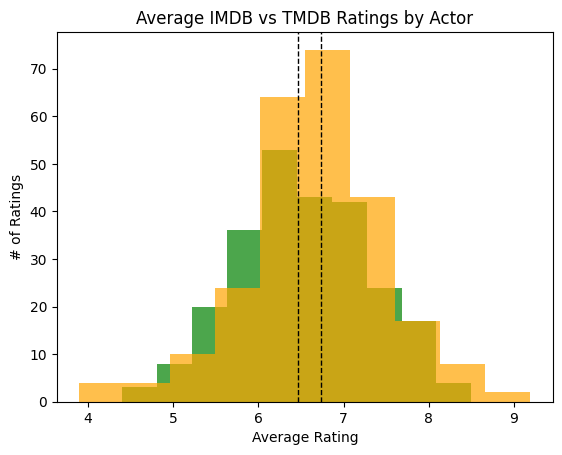

TtestResult(statistic=-24.18681668885409, pvalue=1.361777245720381e-127, df=22233.793290343998)

In [27]:
# Taking a random sample of Creating a histogram and performing an independent t-test to see if there is a statistically significant difference between the IMDB and TMDB scores.
imdb_score_sample = imdb_tmdb_merge["imdb_score"].sample(n=250)
tmdb_score_sample = imdb_tmdb_merge["tmdb_score"].sample(n=250)

plt.hist(imdb_score_sample, alpha=0.7, color="green")
plt.hist(tmdb_score_sample, alpha=0.7, color="orange")
plt.axvline(imdb_tmdb_merge["imdb_score"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(imdb_tmdb_merge["tmdb_score"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.title("Average IMDB vs TMDB Ratings by Actor")
plt.xlabel("Average Rating")
plt.ylabel("# of Ratings")
plt.savefig("output/Actors_IMDBvsTMDB_Scores_Hist")
plt.show()


stats.ttest_ind(imdb_tmdb_merge["imdb_score"], imdb_tmdb_merge["tmdb_score"], equal_var=False)

The r-squared is: 0.41835021736596495


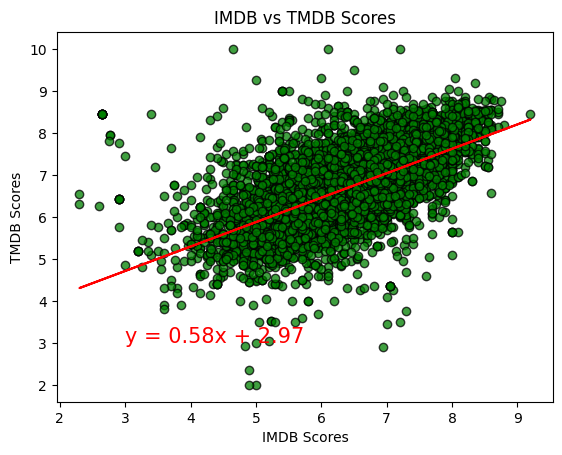

In [29]:
# Creating a scatter plot and regression line to see if there's a significant correlation between IMDB and TMDB movie scores
x_values = imdb_tmdb_merge["imdb_score"]
y_values = imdb_tmdb_merge["tmdb_score"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, alpha=0.75, edgecolors="black", c="green")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, xy=(6, 6), xytext=(3, 3), fontsize=15,color="red")
plt.title("IMDB vs TMDB Scores")
plt.xlabel("IMDB Scores")
plt.ylabel("TMDB Scores")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output/Actors_IMDBvsTMDB_Scores_Scatter")
plt.show()

## 5. Creating a function to generate popular actors by genre
Since we will inevitably want to pitch a specific genre of film, it's worth creating a function whereby we can easily plug in a genre of film and get the most popular and highly rated actors for that genre in particular.

In [142]:
# Created a function to replicate much of the work done in Parts 2 and 3, but for a specific genre or genres
def best_actors_by_genre(genre_labels: list[str]):
    genre_list = []

    for index, row in multiple_actor_df.iterrows():
        if any(genre in row['genres'] for genre in genre_labels):
            genre_list.append({"name": row["name"], "imdb_score": row["imdb_score"], "imdb_votes": row["imdb_votes"]})

    genre_actors = pd.DataFrame(genre_list, columns=["name", "imdb_score", "imdb_votes"])
    most_votes_genre = pd.DataFrame(genre_actors.groupby("name")["imdb_votes"].sum())
    average_votes_genre = pd.DataFrame(genre_actors.groupby("name")["imdb_score"].mean())

    final_genre_df = pd.merge(most_votes_genre, average_votes_genre, on="name")
    
    most_votes_genre = final_genre_df.sort_values("imdb_votes", ascending=False)
    most_votes_genre = most_votes_genre.head(20)
    most_votes_genre.plot.bar(y='imdb_votes', color='orange', width=0.5)
    plt.xlabel('Actor Name')
    plt.title(f'Actors With the Most IMDB Votes: {", ".join(genre_labels)}')
    plt.ylabel('x Million Votes')
    plt.xticks(rotation=80)
    plt.grid()
    plt.show()

    best_score_most_votes_genre = most_votes_genre.sort_values("imdb_score", ascending=False)
    best_score_most_votes_genre.plot.bar(y='imdb_score', color='green', width=0.5)
    plt.title(f'Actors With the Most IMDB Votes: {", ".join(genre_labels)} (Sorted by Score)')
    plt.xlabel('Actor Name')
    plt.ylabel('Mean Score')
    plt.xticks(rotation=80)
    plt.grid()
    plt.show()



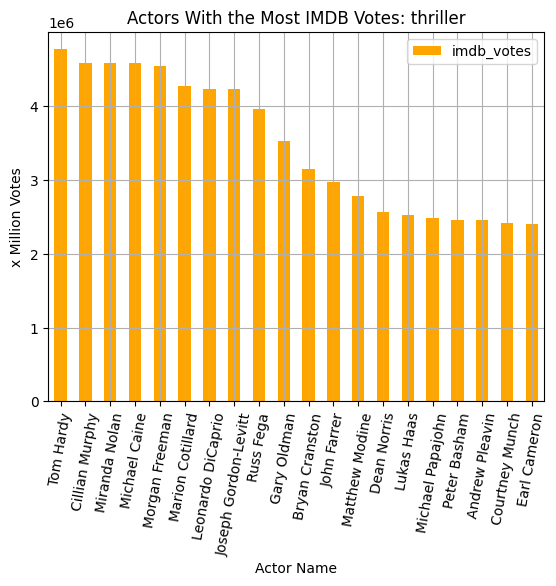

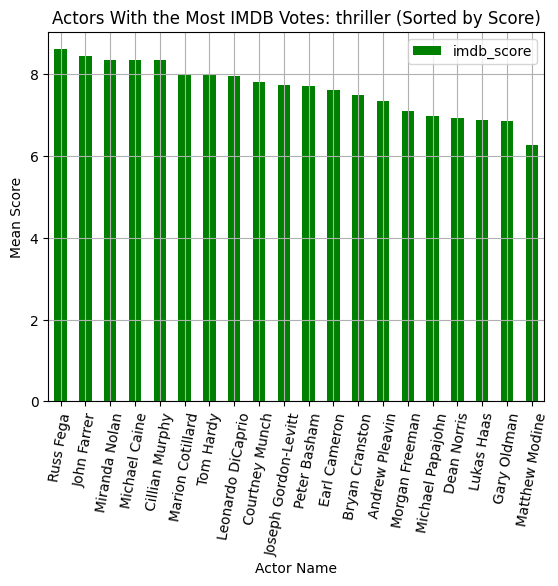

In [143]:
# Test cell for the new function
best_actors_by_genre(["thriller"])